In [74]:
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import datetime
import time
import talib
from talib import *
import matplotlib.pyplot as plt
import math
import numpy as np
import os
from LSSVMRegression import LSSVMRegression
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
yf.pdr_override()

In [75]:
def add_indicators():
        
    R_S_I = RSI(df['Adj Close'], timeperiod=slow)
    E_M_A = EMA(df['Adj Close'], timeperiod=fast)
    macd, macdsig, macdhist = MACD(df['Adj Close'], fastperiod=fast, slowperiod=slow, signalperiod=really_fast)
    mfi = MFI(df['High'], df['Low'], df['Adj Close'],df['Volume'],timeperiod=fast)
    slowk, slowd = STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, 
                         slowk_period=slow, slowk_matype=0, slowd_period=slow, slowd_matype=0)
    
    df['range_o_h'] = df['Open'] - df['High']
    df['range_o_l'] = df['Open'] - df['Low']
    df['range_h_l'] = df['High'] - df['Low']
    
    
    #
    #
    #
    
    df['ema'] = E_M_A
    df['rsi'] = R_S_I
    df['macd'] = macd
    df['macdsig'] = macdsig
    df['macdhist'] = macdhist
    df['mfi'] = mfi
    df['slowK'] = slowk
    df['slowD'] = slowd
    
    
    
    ####
    
    

    #76 vars

    #are_all_zero = (test_TA == 0).all()
    #true if all values are 0
    #false if contain a non 0'''

    #df.drop(['Close'], axis =1, inplace = True)

    

In [76]:
stock = 'AAPL'
df = pd.read_csv(r'C:\Users\Michael\Desktop\Python\Stonks\Data_Scrape\file_storage\US1.AAPL_200319_210331.txt'
                 , parse_dates = [['<DATE>', '<TIME>']])
df.columns = ['datetime','Open','High','Low','Adj Close','Volume']

df = df.set_index(['datetime'])

In [77]:
# 390 intervals / day < 1 min intervals
# 390 < 1 day, 780 < 2 day, 1170 < 3 days, 1560 < 4 day, 1950 < 5 days
# 2340 < 6 days, 2730 < 7 days, 3120 < 8 days, 3510 < 9 days,
# 3900 < 10 days, 4290 < 11 days, 4680 < 12 days, 5070 < 13 days,
# 5460 < 14 days, 5850 < 15 days, 6240 < 16 days, 6630 < 17 days,
                                            # there are more intervals that we can use / change
really_fast = 30
fast = 60
slow = 90

add_indicators()

# Convert Date column to datetime
df.reset_index(level=0, inplace=True)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

df['order_day'] = [x for x in list(range(len(df)))]
# merging_keys


# Get difference between high and low of each day

In [78]:
df.head(5)

,datetime,open,high,low,adj_close,volume,range_o_h,range_o_l,range_h_l,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd,order_day
0,2020-03-19 16:31:00,247.385,248.93,246.86,248.16,23093,-1.545,0.525,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2020-03-19 16:32:00,247.830,247.97,246.00,246.00,10988,-0.140,1.830,1.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2020-03-19 16:33:00,246.000,246.09,244.37,245.33,14576,-0.090,1.630,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2020-03-19 16:34:00,244.990,245.09,244.00,244.88,6976,-0.100,0.990,1.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2020-03-19 16:35:00,244.810,245.39,244.47,245.23,16615,-0.580,0.340,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [79]:
window_size = 60
#df['adj_close_true'] = df['adj_close']
df['adj_close_lag'] = df['adj_close'].shift(window_size)



In [80]:
dates_list = df['datetime']

In [81]:
close_vals_list = df['adj_close']

In [82]:
df.drop(['open', 'high','low'], axis = 1, inplace = True)

In [83]:


#close_vals_list = df['adj_close']

df.fillna(0, inplace=True)

#df.fillna(0, inplace=True)

#BUY => 1, SELL => 0, HOLD => 2

num_test = int(.05*len(df))
num_train = len(df) - num_test

# Split into train, cv, and test
train = df[:num_train]
test = df[num_train:]

#print(test['datetime'].iloc[[-1]])
#print(test['test_labels'].iloc[[-1]])

train_close_vals = close_vals_list[:num_train]
test_close_vals = close_vals_list[num_train:]



#test_dates_list = test['date']
#BUY => 1, SELL => 0, HOLD => 2

In [84]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [85]:
train.head(65)

,datetime,adj_close,volume,range_o_h,range_o_l,range_h_l,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd,order_day,adj_close_lag
0,2020-03-19 16:31:00,248.16,23093,-1.545,0.525,2.07,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0.00
1,2020-03-19 16:32:00,246.00,10988,-0.140,1.830,1.97,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1,0.00
2,2020-03-19 16:33:00,245.33,14576,-0.090,1.630,1.72,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2,0.00
3,2020-03-19 16:34:00,244.88,6976,-0.100,0.990,1.09,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3,0.00
4,2020-03-19 16:35:00,245.23,16615,-0.580,0.340,0.92,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020-03-19 17:31:00,248.23,16094,0.000,0.920,0.92,248.031318,0.0,0.0,0.0,0.0,51.850699,0.0,0.0,60,248.16
61,2020-03-19 17:32:00,248.82,11397,-0.720,0.000,0.72,248.057177,0.0,0.0,0.0,0.0,52.773212,0.0,0.0,61,246.00
62,2020-03-19 17:33:00,248.86,19454,-0.150,0.840,0.99,248.083499,0.0,0.0,0.0,0.0,52.552692,0.0,0.0,62,245.33
63,2020-03-19 17:34:00,249.19,16208,-0.440,0.270,0.71,248.119778,0.0,0.0,0.0,0.0,53.478120,0.0,0.0,63,244.88


In [86]:
test_dates_list = test['datetime']

In [87]:
train_dates_list = train['datetime']

In [88]:
#cols_to_scale = add_scale(num_interval_lag)
#cols_to_scale.remove(cols_to_rem)

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
cols_to_scale = ['range_o_h',#
                 'adj_close_lag',#
                     'range_o_l',#
                     'range_h_l',#
                     'volume',#
                     'ema',#
                     'rsi',#
                     'macd',#
                     'macdsig',#
                     'macdhist',#
                     'mfi',#
                     'slowk',#
                     'slowd']#

In [89]:
#for element in cols_to_rem:

    #if element in cols_to_scale:

        #cols_to_scale.remove(element)

In [90]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

In [91]:

train = train[slow:]

In [92]:
train.head(5)

,datetime,adj_close,volume,range_o_h,range_o_l,range_h_l,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd,order_day,adj_close_lag
90,2020-03-19 18:01:00,245.03,12976,-0.660,0.18,0.840,246.254478,46.769866,0.0,0.0,0.0,42.912571,0.0,0.0,90,249.90
91,2020-03-19 18:02:00,245.65,13808,-0.480,0.42,0.900,246.234659,47.449890,0.0,0.0,0.0,44.234846,0.0,0.0,91,249.06
92,2020-03-19 18:03:00,246.07,14584,-0.630,0.07,0.700,246.229260,47.905786,0.0,0.0,0.0,44.220748,0.0,0.0,92,249.75
93,2020-03-19 18:04:00,245.00,18070,-0.145,1.12,1.265,246.188957,46.858494,0.0,0.0,0.0,43.560920,0.0,0.0,93,249.78
94,2020-03-19 18:05:00,245.32,12029,-0.590,0.21,0.800,246.160466,47.207530,0.0,0.0,0.0,41.755487,0.0,0.0,94,249.63


In [93]:
#scaler = MinMaxScaler(feature_range=(-1,1))

scaler = StandardScaler()

scaler.fit(train[cols_to_scale])
train_scaled = scaler.transform(train[cols_to_scale])

# Convert the numpy array back into pandas dataframe

train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)

In [94]:
#train_scaled['adj_close_lag'] = train['adj_close_lag']

In [95]:
#scaling test dataset

#scaler_2 = StandardScaler()

#test = np.array(test, dtype=np.longdouble)
#scaler_2.fit(test[cols_to_scale])
test_scaled = scaler.transform(test[cols_to_scale])

# Convert the numpy array back into pandas dataframe

test_scaled = pd.DataFrame(test_scaled, columns=cols_to_scale)

features = cols_to_scale

In [96]:
train_scaled.head(5)

,range_o_h,adj_close_lag,range_o_l,range_h_l,volume,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd
0,-3.197926,0.197508,0.314984,2.553711,0.164383,0.167988,-0.675015,0.012984,0.013537,0.000103,-0.742031,-2.880771,-3.281678
1,-2.134041,0.190603,1.666831,2.810373,0.228266,0.167825,-0.556301,0.012984,0.013537,0.000103,-0.609364,-2.880771,-3.281678
2,-3.020612,0.196275,-0.304612,1.954833,0.287849,0.167780,-0.476714,0.012984,0.013537,0.000103,-0.610778,-2.880771,-3.281678
3,-0.154034,0.196522,5.609717,4.371735,0.555512,0.167449,-0.659543,0.012984,0.013537,0.000103,-0.676981,-2.880771,-3.281678
4,-2.784193,0.195289,0.483965,2.382603,0.091671,0.167214,-0.598611,0.012984,0.013537,0.000103,-0.858125,-2.880771,-3.281678


In [97]:
#features.remove(target)

# Split into X and y

X_train = train_scaled[features]
y_train = train['adj_close']

X_test = test_scaled[features]
y_test = test['adj_close']

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = False) # 0.25 x 0.8 = 0.2

In [98]:
X_train.head(5)

,range_o_h,adj_close_lag,range_o_l,range_h_l,volume,ema,rsi,macd,macdsig,macdhist,mfi,slowk,slowd
0,-3.197926,0.197508,0.314984,2.553711,0.164383,0.167988,-0.675015,0.012984,0.013537,0.000103,-0.742031,-2.880771,-3.281678
1,-2.134041,0.190603,1.666831,2.810373,0.228266,0.167825,-0.556301,0.012984,0.013537,0.000103,-0.609364,-2.880771,-3.281678
2,-3.020612,0.196275,-0.304612,1.954833,0.287849,0.167780,-0.476714,0.012984,0.013537,0.000103,-0.610778,-2.880771,-3.281678
3,-0.154034,0.196522,5.609717,4.371735,0.555512,0.167449,-0.659543,0.012984,0.013537,0.000103,-0.676981,-2.880771,-3.281678
4,-2.784193,0.195289,0.483965,2.382603,0.091671,0.167214,-0.598611,0.012984,0.013537,0.000103,-0.858125,-2.880771,-3.281678


In [99]:
y_train.head(5)

90    245.03
91    245.65
92    246.07
93    245.00
94    245.32
Name: adj_close, dtype: float64

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [102]:
preds = reg.predict(X_test)

In [103]:
preds

array([120.75517205, 120.90609419, 121.0402396 , ..., 122.52732947,
       122.61056691, 122.60081368])

In [104]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_close_vals, preds)

0.2499724921157427

In [105]:
print(type(test_dates_list))

<class 'pandas.core.series.Series'>


In [112]:
test_dates_pred = test_dates_list.shift(-window_size)

In [113]:
print(type(test_close_vals))

<class 'pandas.core.series.Series'>


In [114]:
test_close_vals.tail(65)

100878    122.75
100879    122.71
100880    122.71
100881    122.71
100882    122.70
           ...  
100938    122.59
100939    122.58
100940    122.56
100941    122.59
100942    122.60
Name: adj_close, Length: 65, dtype: float64

<IPython.core.display.Javascript object>


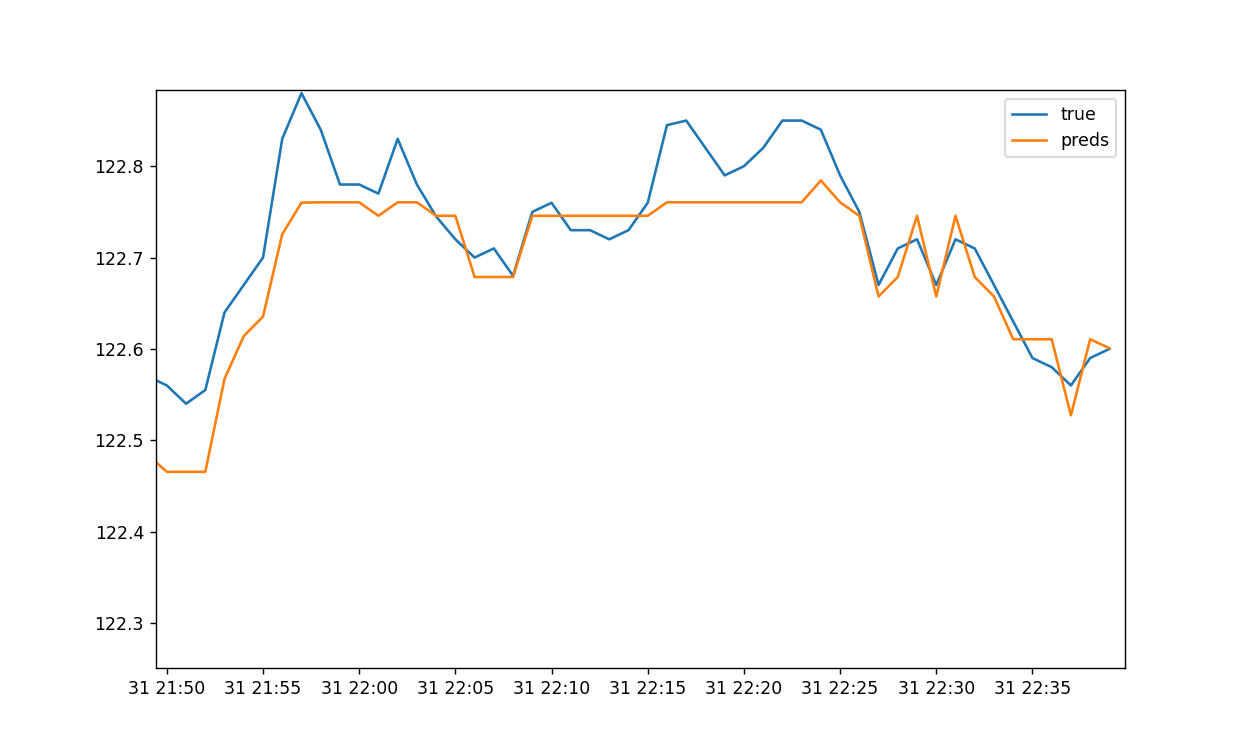

In [117]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, preds)

plt.legend(['true', 'preds'])



In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg_ada = AdaBoostRegressor(random_state=0, n_estimators=100)

In [ ]:
reg_ada.fit(X_train, y_train)

In [ ]:
preds_ada = reg_ada.predict(X_test)



from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_close_vals, preds_ada)


In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, preds_ada)

plt.legend(['true', 'preds'])

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist = HistGradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
preds_hist = hist.predict(X_test)



from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_close_vals, preds_hist)



In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]

plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, preds_hist)

plt.legend(['true', 'preds'])